In [3]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

# Scale the training and testing data so that they are in a range between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Undercomplete Autoencoder

In [5]:
# There are three layers in the autoencoder; input, encoded layer, output
input_size = 784 # Pixel values 28*28
hidden_size = 64 # As this is smaller than the input it is an undercomplete autoencoder
output_size = 784

input_image = Input(shape=(input_size,))
# Encoder
e = Dense(hidden_size, activation='relu')(input_image)
# Decoder
d = Dense(output_size, activation='sigmoid')(e)
encoder = Model(input_image, d)
encoder.compile(optimizer='adam', loss='mse')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder_train = encoder.fit(x_train, x_train, batch_size=100,epochs=10,verbose=1, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0398 - val_loss: 0.0191
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0145 - val_loss: 0.0105
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0089 - val_loss: 0.0071
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0065 - val_loss: 0.0056
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0054 - val_loss: 0.0049
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0048 - val_loss: 0.0045
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0044 - val_loss: 0.0042
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0043 - val_loss: 0.0041
Epoch

### Visualising Reconstructed Images

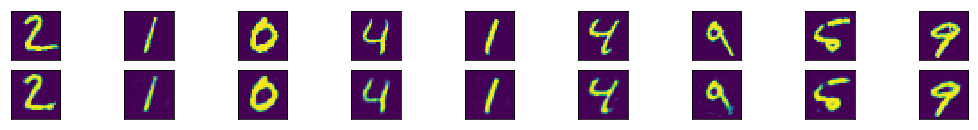

In [7]:
d_images = encoder.predict(x_test)
x = 10
plt.figure(figsize=(20, 2))
for i in range(1, x):
    # Display original images
    ax = plt.subplot(2, x, i)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, x, i + x)
    plt.imshow(d_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Multilayer Autoencoder

In [8]:
input_size = 784
hidden_size = 128 # 64*3 
code_size = 64

input_image = Input(shape=(input_size,))
# Encoder
hidden_1 = Dense(hidden_size, activation='relu')(input_image)
e = Dense(code_size, activation='relu')(hidden_1)

# Decoder
hidden_2 = Dense(hidden_size, activation='relu')(e)
d = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input=input_image, output=d)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


### Convolutional Autoencoder

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()

# Scale the training and testing data so that they are in a range between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
# Convert each 28x28 image into a matrix of size 28 x 28 x 1
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D

ae = Sequential()

# Layers of the encoder
ae.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
ae.add(MaxPooling2D((2, 2), padding='same'))
ae.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
ae.add(MaxPooling2D((2, 2), padding='same'))
ae.add(Conv2D(128, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Layers of the decoder
ae.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
ae.add(UpSampling2D((2, 2)))
ae.add(Conv2D(8, (2, 2), activation='relu', padding='same'))
ae.add(UpSampling2D((2, 2)))
ae.add(Conv2D(64, (3, 3), activation='relu'))
ae.add(UpSampling2D((2, 2)))
ae.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

ae.summary()

ae.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder_train = ae.fit(x_train, x_train, batch_size=128,epochs=3,verbose=1, validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 128)         0         
__________

### Sparse Autoencoders

In [12]:
from keras import regularizers

input_size = 784
h_size = 64
o_size = 784

x = Input(shape=(input_size,))

# Encoder
h = Dense(h_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)

# Decoder
r = Dense(o_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)

### Denoising Autoencoder

In [13]:
# Add noise to the train and test dataset
add_noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_with_noise = x_train + add_noise
add_noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_with_noise = x_test + add_noise

x_train_noisy = np.clip(x_train_with_noise, 0., 1.)
x_test_noisy = np.clip(x_test_with_noise, 0., 1.)

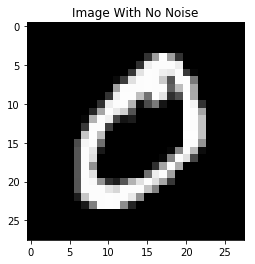

In [14]:
img = x_train[1]
img = img.reshape((28,28))
plt.imshow(img)
plt.title('Image With No Noise')
plt.show()

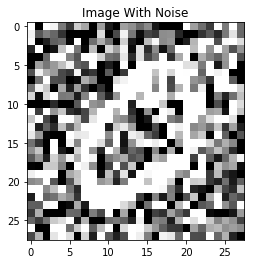

In [15]:
img = x_train_noisy[1]
img = img.reshape((28,28))
plt.imshow(img)
plt.title('Image With Noise')
plt.show()